In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('TRAIN.csv')
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.66,1003.08,958.70,998.33,998.33,147775008
1,2017-01-02,998.62,1031.39,996.70,1021.75,1021.75,222184992
2,2017-01-03,1021.60,1044.08,1021.60,1043.84,1043.84,185168000
3,2017-01-04,1044.40,1159.42,1044.40,1154.73,1154.73,344945984
4,2017-01-05,1156.73,1191.10,910.42,1013.38,1013.38,510199008


In [3]:
train.shape

(900, 7)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
Date         900 non-null object
Open         900 non-null float64
High         900 non-null float64
Low          900 non-null float64
Close        900 non-null float64
Adj Close    900 non-null float64
Volume       900 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 49.3+ KB


In [5]:
train.duplicated().sum()

0

In [6]:
test = pd.read_csv('TEST.csv')
test.head()

,Date,Open,High,Low
0,2019-06-20,9273.06,9594.42,9232.48
1,2019-06-21,9525.07,10144.56,9525.07
2,2019-06-22,10175.92,11157.35,10107.04
3,2019-06-23,10696.69,11246.14,10556.10
4,2019-06-24,10853.74,11065.90,10610.43


In [7]:
test.shape

(149, 4)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
Date    149 non-null object
Open    149 non-null float64
High    149 non-null float64
Low     149 non-null float64
dtypes: float64(3), object(1)
memory usage: 4.7+ KB


In [9]:
newtest = pd.read_csv('TEST.csv', index_col='Date',parse_dates=True)
newtest.head()

,Open,High,Low
Date,,,
2019-06-20,9273.06,9594.42,9232.48
2019-06-21,9525.07,10144.56,9525.07
2019-06-22,10175.92,11157.35,10107.04
2019-06-23,10696.69,11246.14,10556.10
2019-06-24,10853.74,11065.90,10610.43


In [61]:
newtrain = train
newtrain = newtrain.drop(['Open', 'High', 'Low','Adj Close', 'Volume'], axis = 1)
newtrain.head(2)

,Date,Close
0,2017-01-01,998.33
1,2017-01-02,1021.75


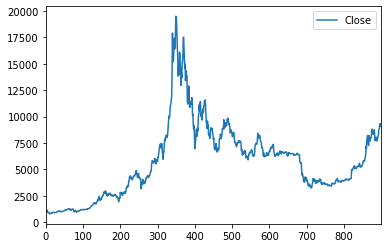

In [62]:
newtrain.plot()

In [10]:
train['Date'] = pd.to_datetime(train['Date'])
newtest = test
newtest['Date'] = pd.to_datetime(newtest['Date'])

In [11]:
train.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.66,1003.08,958.7,998.33,998.33,147775008
1,2017-01-02,998.62,1031.39,996.7,1021.75,1021.75,222184992
2,2017-01-03,1021.60,1044.08,1021.6,1043.84,1043.84,185168000


In [12]:
train['year'] = train['Date'].dt.year
train['day'] = train['Date'].dt.day
train['month'] = train['Date'].dt.month
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,day,month
0,2017-01-01,963.66,1003.08,958.70,998.33,998.33,147775008,2017,1,1
1,2017-01-02,998.62,1031.39,996.70,1021.75,1021.75,222184992,2017,2,1
2,2017-01-03,1021.60,1044.08,1021.60,1043.84,1043.84,185168000,2017,3,1
3,2017-01-04,1044.40,1159.42,1044.40,1154.73,1154.73,344945984,2017,4,1
4,2017-01-05,1156.73,1191.10,910.42,1013.38,1013.38,510199008,2017,5,1


In [13]:
newtest['year'] = newtest['Date'].dt.year
newtest['day'] = newtest['Date'].dt.day
newtest['month'] = newtest['Date'].dt.month
newtest.head()

,Date,Open,High,Low,year,day,month
0,2019-06-20,9273.06,9594.42,9232.48,2019,20,6
1,2019-06-21,9525.07,10144.56,9525.07,2019,21,6
2,2019-06-22,10175.92,11157.35,10107.04,2019,22,6
3,2019-06-23,10696.69,11246.14,10556.10,2019,23,6
4,2019-06-24,10853.74,11065.90,10610.43,2019,24,6


In [14]:
train = train.drop(['Date', 'Adj Close', 'Volume'], axis = 1)
newtest = newtest.drop('Date', axis = 1)

In [15]:
train.head(2)

,Open,High,Low,Close,year,day,month
0,963.66,1003.08,958.7,998.33,2017,1,1
1,998.62,1031.39,996.7,1021.75,2017,2,1


In [16]:
newtest.head(2)

,Open,High,Low,year,day,month
0,9273.06,9594.42,9232.48,2019,20,6
1,9525.07,10144.56,9525.07,2019,21,6


In [17]:
x = train.drop('Close', axis = 1)
y = train['Close']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [19]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

238.3528008929693


In [22]:
from lightgbm import LGBMRegressor
x_train = train.drop('Close', axis = 1)
y_train = train['Close']
x_test = newtest
lgbm = LGBMRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'Date': test.Date, 'Close': y_pred})
solution.to_csv('Solution1.csv', index = False)